# Zadanie nr 3

Treść: Zadanie polega na napisaniu programu realizującego rekurencyjną LU faktoryzację macierzy kwadratowych wymiarów $2^k\times 2^k$, posługując się algorytmem z wykładu oraz rekurencyjnym mnożeniem macierzowym z zadania pierwszego i rekurencyjnym odwracaniem macierzy z zadania drugiego. Rozważane przez nas $k$ należy do zbioru $\{ 1,2,\ldots, 8 \}$. W raporcie omówimy następujące kwestie:
1. Implementacja oraz pseudokod implementowanych funkcji.
2. Narysowaniu wykresu zależności czasu działania algorytmu od rozmiaru macierzy $2^{k}\times 2^{k}, k = 2,3,4,\ldots, 8$.
3. Narysowaniu wykresu zależności liczby operacji zmiennoprzecinkowych dla algorytmu od rozmiaru macierzy $2^{k}\times 2^{k}, k = 2,3,4,\ldots, 8$.
4. Wnioski.

In [1]:
# import bibliotek
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import time
import sys

%matplotlib inline

In [2]:
def is_power_of_two(n):
    """Funtion to determine if number n is a power of 2"""
    
    return (math.ceil(math.log(n,2)) == math.floor(math.log(n,2)))

## Pseudokod dla algorytmu realizującego mnożenie macierzy sposobem rekurencyjnym Bineta:
Do odwracania macierzy wykorzystamy mnożenie rekurencyjnym sposobem Bineta z poprzedniego zadania. Mnożenie to jest wykorzystywane do kwadratowych macierzy wymiaru $2^l \times 2^l$, w którym $l$ oznacza wykładnik potęgi oraz poziom przełączania mnożenia z tradycyjnego na rekurencyjny. W poprzednich projektach zauważyliśmy, że poziomem przełączania, dla którego czas jest optymalny jest $l = 5$.

1. Wczytujemy dwie macierze kwadratowe $A$ i $B$ wymiarów $2^k\times 2^k$. Macierze te są odpowiednimi kwadratowymi blokami odwracanej niżej macierzy. Wymagane założenia są sprawdzane w funkcji sterującej main(). Przypisujemy wymiar macierzy (który jest taki sam w $A$, jak i w $B$) do zmiennej dim.
2. Jeżeli dim > 2, to realizujemy slicing w macierzach $A$ i $B$, który będzie stanowić podział w tych macierzach na 4 macierze blokowe w $A$, jak i w $B$. Odpowiednie macierze blokowe w macierzy $A$ to $A_{1}, A_{2}, A_{3}, A_{4}$, a w macierzy $B$ to $B_{1}, B_{2}, B_{3}, B_{4}$. Do listy (zadeklarowanej w funkcji sterującej main) operations_count_list, przechowującej liczbę operacji zmiennoprzecinkowych, przy każdym wywołaniu dodajemy liczbę 12. Następnie mnożymy bloki macierzy, traktując je jako w pewnym sensie jako "skalary", a następnie przykładamy funkcję multiply_matrices_Binet do każdego z wymnożonego bloku.
3. Jeżeli dim == 2, to wykonujemy standardowe mnożenie macierzy (wymiar = 2, więc macierze blokowe są skalarami, czyli macierzami jednowymiarowymi).
4. Zwracamy wynik mnożenia macierzowego.

In [3]:
def multiply_matrices_Binet(A, B):
    """Function to multiplicate matrices A and B using recursively Binet's method"""
    
    A = np.matrix(A)
    B = np.matrix(B)
    
    dim = A.shape[0]
    
    if dim > 2:
        
        A_1 = A[0:int(dim/2), 0:int(dim/2)]
        A_2 = A[0:int(dim/2), int(dim/2):dim]
        A_3 = A[int(dim/2):dim, 0:int(dim/2)]
        A_4 = A[int(dim/2):dim, int(dim/2):dim]

        B_1 = B[0:int(dim/2), 0:int(dim/2)]
        B_2 = B[0:int(dim/2), int(dim/2):dim]
        B_3 = B[int(dim/2):dim, 0:int(dim/2)]
        B_4 = B[int(dim/2):dim, int(dim/2):dim]
        
        operations_count_list.append(12)
        
        C_1 = multiply_matrices_Binet(A_1, B_1) + multiply_matrices_Binet(A_2, B_3)
        C_2 = multiply_matrices_Binet(A_1, B_2) + multiply_matrices_Binet(A_2, B_4)
        C_3 = multiply_matrices_Binet(A_3, B_1) + multiply_matrices_Binet(A_4, B_3)
        C_4 = multiply_matrices_Binet(A_3, B_2) + multiply_matrices_Binet(A_4, B_4)
        
    elif dim == 2:
        
        operations_count_list.append(12)
        
        result = np.zeros(shape = (dim, dim))
        result[0,0] = A[0,0] * B[0,0] + A[0,1] * B[1,0]
        result[0,1] = A[0, 0] * B[0,1] + A[0,1] * B[1,1]
        result[1,0] = A[1,0] * B[0,0] + A[1,1] * B[1,0]
        result[1,1] = A[1,0] * B[0,1] + A[1,1] * B[1,1]
                        
        return result
    
    upper_half = np.concatenate((C_1, C_2), axis=1)
    lower_half = np.concatenate((C_3, C_4), axis=1)
    result = np.concatenate((upper_half, lower_half), axis = 0)
    return result

## Napiszemy teraz pseudokod dla algorytmu realizującego mnożenie macierzy sposobem tradycyjnym:
1. Wczytujemy dwie macierze kwadratowe A i B wymiarów $2^l\times 2^l$. Odpowiednie założenia zostaną zweryfikowane w funkcji sterującej main(), którą opiszemy w dalszym ciągu raportu.
2. Inicjalizujemy macierz zer result będącą wynikiem mnożenia macierzowego, zmienną s, która będzie służyć jako suma tymczasowa do wpisywania elementów macierzy wynikowej, zliczamy także liczbę operacji zmiennoprzecinkowych.
3. Dla każdego wiersza macierzy A, dla każdej kolumny macierzy B oraz dla każdej kolumny (wiersza) macierzy A (B) korzystamy ze wzoru na sumę składowych elementów macierzy wynikowej, licząc przy tym liczbę operacji zmiennoprzecinkowych.
4. Zwracamy wynik.

In [4]:
def multiply_matrices_traditional(A, B):
    """Function to multiplicate matrices A and B using traditional method"""
    dim = A.shape[0]
    result = np.zeros(shape = (dim, dim))
    s = 0
    
    
    for row in range(dim):
        for col in range(dim):
            for k in range(dim):
                s += A[row, k] * B[k, col]
                operations_count_list.append(1)
            operations_count_list.pop(1)
            result[row, col] = s
            s = 0
    return result

## Pseudokod funkcji wybierającej sposób mnożenia 
1. Wczytujemy macierze kwadratowe A i B rozmiarów takich, jak w poprzednio opisanych pseudokodach, oraz liczbę $l$, której znaczenie pozostaje zgodne z treścią zadania (zmienna sterująca przełączaniem pomiędzy funkcją multiply_matrices_traditional a funkcją multiply_matrices_Binet). Jest domyślnie ustawiona jako $l = 5$, ponieważ jak już wyżej zauważyliśmy jest to poziom przełączania, dla którego czas mnożenia jest optymalny.
2. Sprawdzamy zgodność założeń: czy macierze A i B są kwadratowe rozmiarów $2^k\times 2^k$.
3. Jeżeli wymiar macierzy jest mniejszy niż $2^l$, to wywołujemy funkcję multiply_matrices_traditional. W przeciwnym razie wywołujemy funkcję multiply_matrices_Binet.

In [5]:
# A and B are matrices, l is method threshold

def multiply_matrices(A, B, l=5):
    """Driver function to multiplication matrices A and B"""
    try:
        A = np.matrix(A)
        B = np.matrix(B)
        l = int(l)
    except ValueError:
        print("Check corectness of parameters!")
        
    dim_row_A = A.shape[0]
    dim_col_A = A.shape[1]
    dim_row_B = B.shape[0]
    dim_col_B = B.shape[1]

    
    if (is_power_of_two(dim_row_A)) & (is_power_of_two(dim_row_B)) & (dim_row_A == dim_col_A) & (dim_row_B == dim_col_B) & (dim_row_A == dim_col_B):
        
        dim = dim_row_A
        
        if dim <= 2**l:
#             print('Traditional method')
            return multiply_matrices_traditional(A, B)
        else:
#             print('Binet\'s method')
            return multiply_matrices_Binet(A, B)
    else:
        print('Check dimensionality of matrices!')
        raise ValueError

## Pseudokod dla algorytmu realizującego rekurencyjne odwracanie macierzy
1. Wczytujemy dane wejściowe - obiekt konwertowalny do macierzy kwadratowej wymiarów $2^k\times 2^k$, gdzie $k\in \{1,2,\ldots,8\}$, ustawiamy optymalny poziom przełączania $l=5$ jako parametr domyślny..
2. Sprawdzenia założeń co do wprowadzonych danych wejściowych sprawdzimy w funkcji sterującej main.
3. Jeżeli wymiar macierzy jest większy, niż 2, to:
* Realizujemy slicing, dzieląc oryginalną macierz A na 4 macierze blokowe $A_{11}, A_{12}, A_{21}, A_{22}$.
* Korzystamy ze wzorów z wykładu, a poszczególne macierze blokowe z algorytmu podanego na wykładzie przypisujemy do zmiennych $B_{11}, B_{12}, B_{21}, B_{22}$. Aby wyznaczyć te macierze blokowe, musimy wywoływać rekurencyjnie w odpowiednich miejsach odwracanie macierzowe.
4. W przeciwnym przypadku wymiar jest równy 2 i wykonujemy "tradycyjne" odwracanie macierzy, o ile wyznacznik nowo otrzymanej macierzy jest różny od zera. Jeżeli wyznacznik jest równy zeru, to zwracamy użytkownikowi komunikat o błędzie.
5. Realizujemy konkatenację odpowiednich bloków macierzowych i zwracamy macierz odwrotną $A^{-1}$.
6. W trakcie działania algorytmu zliczamy liczbę operacji zmiennoprzecinkowych, dopisując kolejne liczby operacji do listy operations_count_list zadeklarowanej w funkcji sterującej main().

In [6]:
def inverse_matrix(A, l=5):
    """Function returns inverse matrix of A"""
        
    dim = A.shape[0]
    
    if dim > 2:
        A_11 = A[0:int(dim/2), 0:int(dim/2)]
        A_12 = A[0:int(dim/2), int(dim/2):dim]
        A_21 = A[int(dim/2):dim, 0:int(dim/2)]
        A_22 = A[int(dim/2):dim, int(dim/2):dim]          
            
        operations_count_list.append(2)
            
        A_11_inv = inverse_matrix(A_11)           
        mult_A_21_A_11_inv = multiply_matrices(A_21, A_11_inv, l)          
        S_22 = A_22 - multiply_matrices(mult_A_21_A_11_inv, A_12, l)
        S_22_inv = inverse_matrix(S_22)            
        mult_A_11_inv_A_12_S_22_inv = multiply_matrices(multiply_matrices(A_11_inv, A_12, l=5), S_22_inv, l)
            
        B_11 = A_11_inv + multiply_matrices(mult_A_11_inv_A_12_S_22_inv, mult_A_21_A_11_inv, l)
        B_12 = -mult_A_11_inv_A_12_S_22_inv
        B_21 = multiply_matrices(-S_22_inv, mult_A_21_A_11_inv, l)
        B_22 = S_22_inv
        
    elif dim == 2:
        if (A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]) != 0:
            inv_matrix = (1 / (A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0])) * np.matrix([[A[1,1], -A[0,1]], [-A[1, 0], A[0, 0]]])
            operations_count_list.append(5)
            return inv_matrix
        else:
            print('Determinant cannot be equal to zero!')
            sys.exit(1)

    upper_half = np.concatenate((B_11, B_12), axis=1)
    lower_half = np.concatenate((B_21, B_22), axis=1)
    inv_matrix = np.concatenate((upper_half, lower_half), axis = 0)
        
    return inv_matrix

## Psuedokod dla algorytmu realizującego rekurencyjną LU faktoryzację
1. Wczytujemy macierz kwadratową (obiekt konwertowalny do macierzy kwadratowej) wymiarów $A$ wymiarów $2^k$, gdzie $k\in\{1,2,\ldots, 8\}$. W funkcji main() sprawdzimy, czy wprowadzony przez użytkownika input jest pożądanym obiektem.
2. Jeżeli wymiar macierzy jest większy, niż 2, to realizujemy slicing, dzieląc oryginalną macierz A na 4 macierze blokowe $A_{11}, A_{12}, A_{21}, A_{22}$, a następnie, korzystając ze wzorów z wykładu:
* obliczamy rekurencyjnie $LU(A_{11})$,
* obliczamy rekurencyjnie $U_{11}^{-1}$,
* obliczamy rekurencyjnie mnożenie macierzy $A_{21}$ i $U_{11}^{-1}$, a wynik zapisujemy do $L_{21}$,
* obliczamy rekurencyjnie $L_{11}^{-1}$,
* obliczamy rekurencyjnie mnożenie macierzy $L_{11}^{-1}$ i $A_{12}$, a wynik zapisujemy do $U_{12}$,
* obliczamy rekurencyjnie $L_{22}$ i $U_{22}$,
* obliczamy rekurencyjnie $LU(L_{22})$, zwracając krotkę w postaci $(L, U)$, gdzie $L$ jest macierzą dolnotrójkątną oraz $U$ będącą maierzą górnotrójkątną,
* na każdym poziomie rekurencji zliczamy liczbę operacji zmiennoprzecinkowych, zapisując tę liczbę do listy operations_count_list, zadeklarowaną w funkcji sterującej main().
3. Jeżeli wymiar macierzy jest równy dwa, to, uprzednio sprawdzając, czy nie występuje dzielenie przez $0$, realizujemy tradycyjną LU faktoryzację (opisaną powyżej LU faktoryzację, ale bez wywołania rekurencyjnego).
4. Realizujemy konkatenację odpowiednich bloków macierzowych i zwracamy krotkę macierzy $(L, U)$.

In [7]:
def LU(A):
    """Function returns LU decomposition of A matrix"""
    
    dim = A.shape[0]
    
    if dim > 2:
        A_11 = A[0:int(dim/2), 0:int(dim/2)]
        A_12 = A[0:int(dim/2), int(dim/2):dim]
        A_21 = A[int(dim/2):dim, 0:int(dim/2)]
        A_22 = A[int(dim/2):dim, int(dim/2):dim]
        
        operations_count_list.append(1)
        
        L_11, U_11 = LU(A_11)
        L_11_inv = inverse_matrix(L_11)
        mult_L_11_inv_A_12 = multiply_matrices(L_11_inv, A_12)
        U_11_inv = inverse_matrix(U_11)
        L_21 = multiply_matrices(A_21, U_11_inv)
        U_12 = mult_L_11_inv_A_12
        L_22 = A_22 - multiply_matrices(L_21, mult_L_11_inv_A_12)
        
        L_22, U_22 = LU(L_22)
     
    elif dim == 2:
        if A[0,0]==0:
            print("\nMatrix {} has a_11 value equal to 0".format(A))
            raise Exception("ZeroDivisionError")
        else:
            operations_count_list.append(4)
            L = np.matrix([ [1, 0], [A[1,0] / A[0,0], 1] ])
            U = np.matrix([ [A[0,0], A[0,1]], [0, A[1,1] - A[0,1]*A[1,0] / A[0,0]] ])

            return (L, U)
    
    L_12 = np.zeros(shape=(int(dim/2), int(dim/2)))
    U_21 = L_12
    L_upper_half = np.concatenate((L_11, L_12), axis=1)
    L_lower_half = np.concatenate((L_21, L_22), axis=1)
    L = np.concatenate((L_upper_half, L_lower_half), axis = 0)
    
    U_upper_half = np.concatenate((U_11, U_12), axis=1)
    U_lower_half = np.concatenate((U_21, U_22), axis=1)
    U = np.concatenate((U_upper_half, U_lower_half), axis = 0)
    
    return (L, U)

## Pseudokod funkcji sterującej
1. Wczytujemy obiekt konwertowalny do macierzy kwadratowej A rozmiarów takich, jak w poprzednio opisanych pseudokodach, sprawdzając czy A jest macierzą kwadratową wymaganych wymiarów.
2. Deklarujemy globalną listę operations_count_list, która służy do zliczania wykonywanych operacji zmiennoprzecinkowych.
3. Wykonujemy na maierzy A funkcję LU($A$).
4. Zwracamy słownik składający się z macierzy $L$, macierzy $U$, liczby wykonanych operacji zmiennoprzecinkowych i wyznacznika. Nie zwracamy wartości własnych z polecenia, ponieważ nie są to wartości własne.

In [8]:
def main(A):
    """Drive function"""
    try:
        A = np.matrix(A)
    except ValueError:
        print('A should be able to be converted to matrix!')
        
    global operations_count_list
    operations_count_list = []
    dim = A.shape[0]
    
    if (dim == A.shape[1]) & (is_power_of_two(dim)):
        L, U = LU(A)
        return {'L matrix' : L,
                'U matrix' : U,
                'Number of operations' : np.sum(operations_count_list),
                'Determinant' : round(np.prod(U.diagonal()), 3)
               }
    
    else:
        print('Check dimensionality of matrix!')
        raise ValueError
        

## Generowanie macierzy
1. Ustalamy seed równy 123456, żeby upewnić się, że generowane przez nas macierze za każdym wczytaniem komórki będą takie same.
2. Tworzymy listę x_axis, która przechowuje rozmiary sprawdzanych przez nas macierzy. Rozmiary te obejmują zakres liczb od $2^1$ aż do $2^8$.
3. Wewnątrz funkcji generate_matrices deklarujemy pustą listę list_with_matrices, którą następnie powiększamy o każdą wygenerowaną macierz.

In [9]:
np.random.seed(123456)

x_axis = [2**int_number for int_number in range(1,9)]

def generate_matrices():
    """This function retruns a tensor with generated len(x_axis) square matrices of size in list x_axis to inverse"""
    
    list_with_matrices = []
    for row_index in range(len(x_axis)):
        M = np.random.randint(-100, 100, size = (x_axis[row_index], x_axis[row_index]))
        list_with_matrices.append(M)
    return list_with_matrices

In [10]:
generated_matrices = generate_matrices()

## Faza testowa dla wyznaczników
Porównamy teraz wyznaczniki policzone przy pomocy biblioteki Numpy z wyznacznikami policzonymi za pomocą napisanego przez nas programu.

In [34]:
determinants_LU = []
determinants_numpy = []
matrices_to_compare = generated_matrices[:6]

for matrix in matrices_to_compare:
    
    det_numpy = round(np.linalg.det(matrix), 3)
    det_LU = main(matrix)['Determinant']
    
    determinants_numpy.append(det_numpy)
    determinants_LU.append(det_LU)

In [37]:
data = {'Numpy determinant' : determinants_numpy, 'Recurrent LU' : determinants_LU}
df = pd.DataFrame(data, index=[_ for _ in range(1, 7)])
df

,Numpy determinant,Recurrent LU
1,-4.729000e+03,-4.729000e+03
2,1.934962e+08,1.934962e+08
3,4.821220e+15,4.821220e+15
4,-1.748412e+34,-1.748412e+34
5,3.789607e+73,3.789607e+73
6,-3.095324e+156,-3.095324e+156


Policzone wyznaczniki są sobie równe z dokładnością do 3 miejsc po przecinku (z uwagi na błędy numeryczne).

## Czas mnożenia oraz liczba wykonywanych operacji
1. Wewnątrz funkcji generate_y_axis inicjalizujemy dwie puste listy: y_axis_time oraz y_axis_operations, do których dodawać będziemy odpowiednio czas oraz liczbę wykonanych operacji w zależności od rozmiaru dekomponowanych macierzy. 
2. W pętli 'for' rozpoczynamy mierzenie czasu, a następnie odwracamy po kolei wszystkie macierze będące elementami wyżej wygenerowanej listy generated_matrices.
3. Funkcja zwraca krotkę składającą się z dwóch list y_axis_time oraz y_axis_operations. Każdy element krotki posłuży nam jako wartości na prezentowanych wykresach.

In [13]:
def generate_y_axis(generated_matrices):
    """Function returns time of inverting matrices and number of operations"""
        
    y_axis_time = []
    y_axis_operations = []
    
    for matrix in generated_matrices:

        start_time = time.time()
        result = main(matrix)
        y_axis_time.append(time.time() - start_time)
        y_axis_operations.append(result['Number of operations'])
    return (y_axis_time, y_axis_operations)
        
y_axis = generate_y_axis(generated_matrices)

C:\anaconda\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


## Wykresy

#### Wykres przedstawiający zależność rozmiaru macierzy od czasu potrzebnego na wykonanie LU faktoryzacji poszczególnych macierzy.

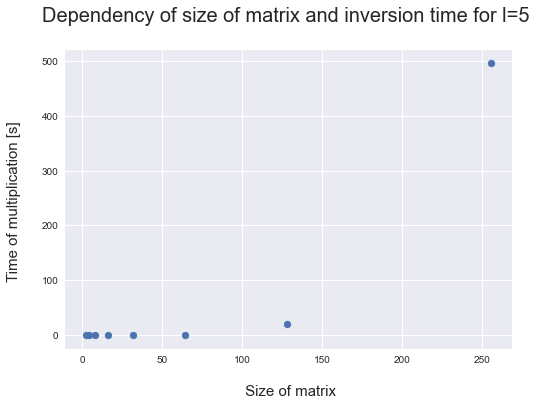

In [14]:
plt.style.use('seaborn')
plt.scatter(x_axis, y_axis[0])
plt.xlabel('\n Size of matrix', fontsize=15)
plt.ylabel('Time of multiplication [s] \n', fontsize=15)
plt.title('Dependency of size of matrix and inversion time for l=5 \n', fontsize = 20)
plt.show()

#### Wykres przedstawiający zależność rozmiaru macierzy od liczby wykonywanych operacji przy odwracaniu poszczególnych macierzy

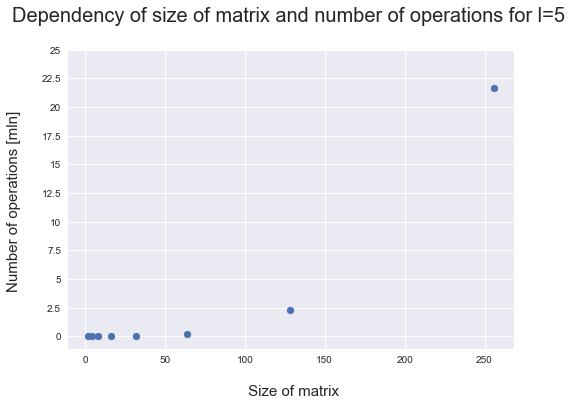

In [21]:
plt.style.use('seaborn')
plt.scatter(x_axis, y_axis[1])
plt.xlabel('\n Size of matrix',fontsize=15)
plt.ylabel('Number of operations [mln] \n',fontsize=15)
plt.yticks([0,2500000,5000000,7500000,10000000,12500000,15000000,17500000,20000000,22500000,25000000],['0','2.5','5','7.5',
                                                                          '10','12.5','15','17.5', '20','22.5','25'])
plt.title('Dependency of size of matrix and number of operations for l=5 \n',fontsize=20)
plt.show()

## Wnioski:
* Zależność rozmiaru macierzy od czasu jej LU faktoryzacji wskazuje na złożoność $O(n^3)$.
* Zależność rozmiaru macierzy od liczby wykonanych operacji wskazuje na złożoność $O(n^3)$.

Powyższe wnioski zgadzają się z teorią przedstawioną na wykładzie.